# Importing Libraries and Directories

In [1]:
import numpy as np # Library for working with arrays
import pandas as pd # Library for working with data
import cv2 # Library for working with images
import os # Library for working with the file system
from glob import glob # Library for finding files matching a pattern
import matplotlib.pyplot as plt # Module used to display the images as plots

# Set the directory for the imagesPath
imagesPath = './Flickr_Data/Images/'

## Image Pre-processing

In [2]:
# Use glob to locate all the files that end in '.jpg' in the 'imagesPath' and store in list 'images'
images = glob(imagesPath+'*.jpg')

# Output the number of images in the list
len(images)

8091

In [3]:
# Output the first 5 image paths.
images[:5]

['./Flickr_Data/Images\\1000268201_693b08cb0e.jpg',
 './Flickr_Data/Images\\1001773457_577c3a7d70.jpg',
 './Flickr_Data/Images\\1002674143_1b742ab4b8.jpg',
 './Flickr_Data/Images\\1003163366_44323f5815.jpg',
 './Flickr_Data/Images\\1007129816_e794419615.jpg']

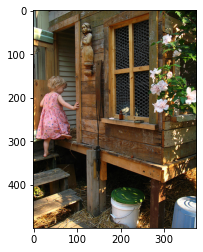

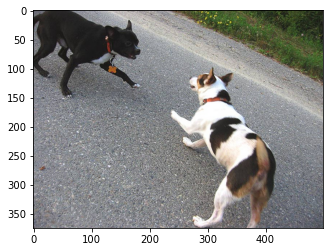

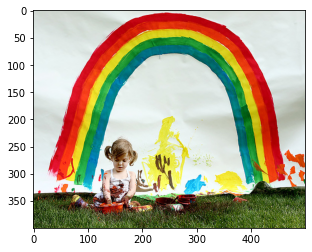

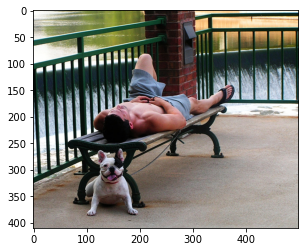

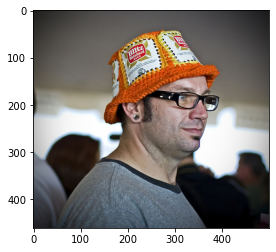

In [4]:
# For loop for 5 elements in 'images'

for i in range(5):
    # Create a new figure each iteration
    plt.figure()
    # Read the image file
    img = cv2.imread(images[i])
    # Convert the image from BGR color space to RGB color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image on the current figure
    plt.imshow(img)

In [5]:
from keras.applications import ResNet50 # ResNet50 is a pre-trained model for image recognition

# Initialize the ResNet50 model with the top layers included
imageRecognitionModel = ResNet50(include_top=True)

In [6]:
from keras.models import Model # Import Model for creating a new model

# Get the output of the second last layer of imageRecognitionModel
lastOutput = imageRecognitionModel.layers[-2].output

# Model with input set to the input of the imageRecognitionModel and the output set to the second last layer
truncatedModel = Model(inputs = imageRecognitionModel.input, outputs = lastOutput)

# Print a summary of the new model
truncatedModel.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
# Create an empty dictionary to store the features of the images
imageFeatures = {}

# Initialize a counter to keep track of the number of images processed
count = 0

# Loop through all the images
for i in images:
    # Read in the image, convert it to RGB
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224)) # Resize it to (224, 224)
    
    img = img.reshape(1,224,224,3) # Reshape the image to (1, 224, 224, 3)
    
    pred = truncatedModel.predict(img, verbose=0).reshape(2048,) # Use model to predict the features of the image
        
    imgName = os.path.basename(i) # Get the name of the image
    # print(imgName)
    imageFeatures[imgName] = pred # Add image name and its features to the dictionary
    
    count += 1 # Increment the counter every iteration
    if count > 1499:
        break
        
    # Print the count every 100 iterations
    if count == 1:
        print(f'Processed {count} image')
    elif count % 100 == 0:
        print(f'Processed {count} images')


Processed 1 image
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images


In [8]:
len(imageFeatures)

1500

## Text Pre-processing

In [9]:
# Set the directory for the captionPath
captionPath = './Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [10]:
captions = open(captionPath, 'rb').read().decode('utf-8').split('\n')
len(captions)

40461

In [38]:
# Create an empty dictionary to store the captions for the images
captionsDict = {}

# Loop through all the captions
for i in captions:
    try:
        # Get the image name from the caption
        imgName = i.split('\t')[0][:-2] 
        # Get the caption
        caption = i.split('\t')[1]

        # Check if the image name is in the dictionary of image features
        if imgName in imageFeatures:
            # If the image name is not already in the captions dictionary
            if imgName not in captionsDict:
                # Add the image name as a key and the caption as the value
                captionsDict[imgName] = [caption]
                
            # If the image name is already in the captions dictionary
            else:
                # Append the caption to the existing list of captions
                captionsDict[imgName].append(caption)
            
    # Pass if an exception is thrown
    except:
        pass


In [39]:
len(captionsDict)

1500

## Visualize Images with the Captions

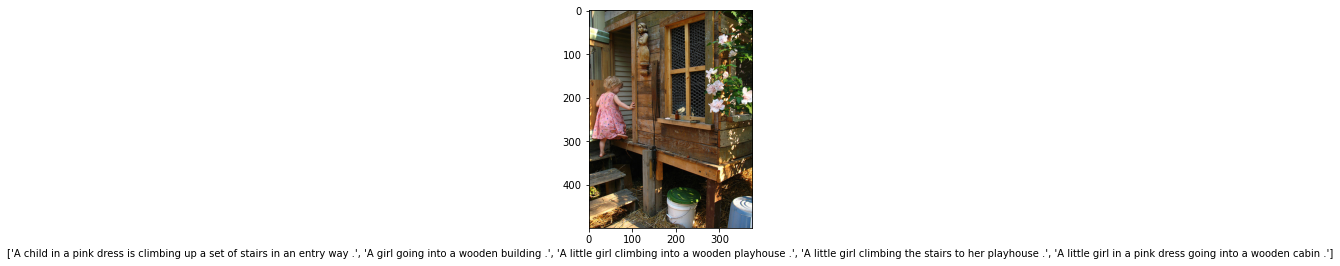

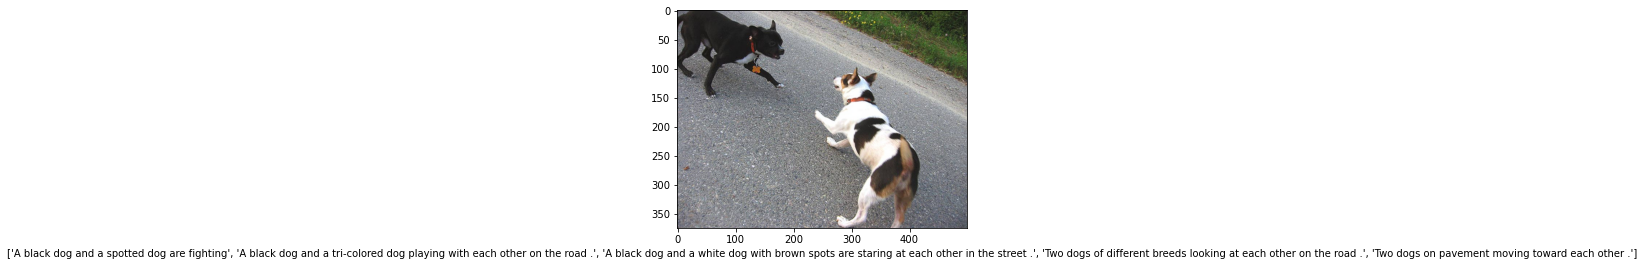

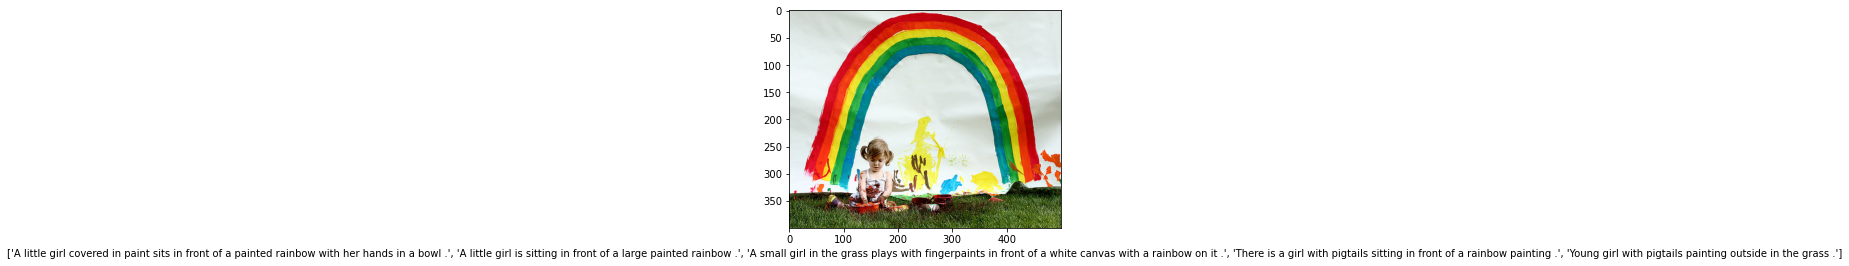

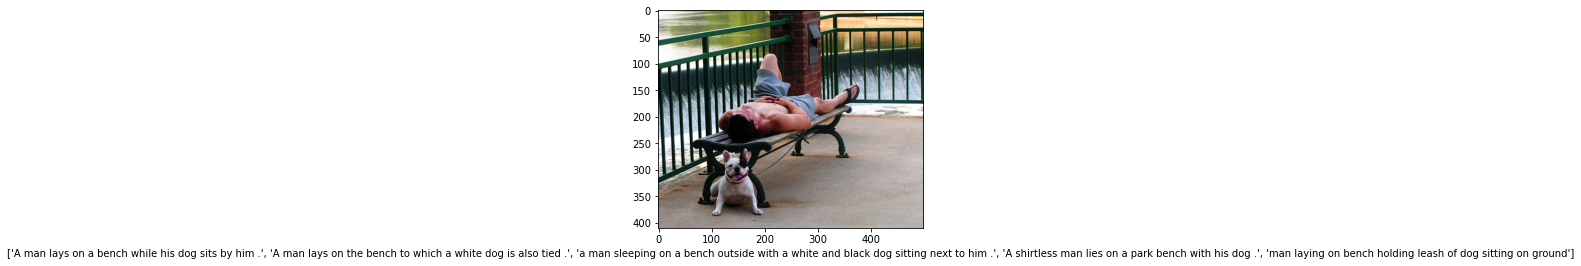

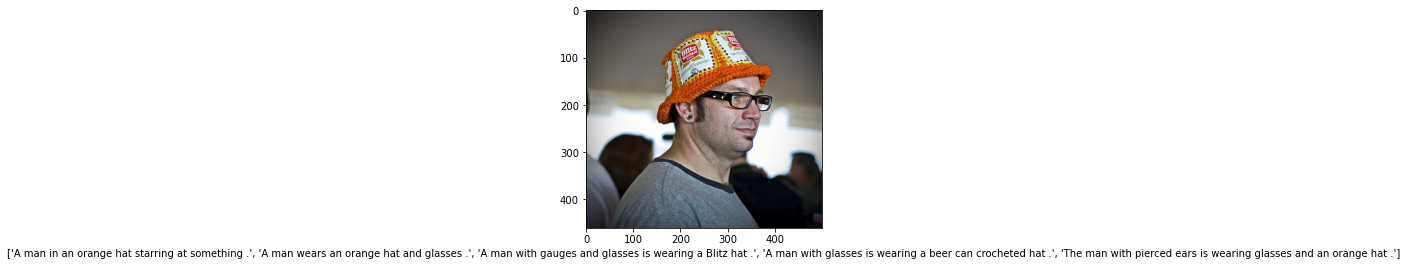

In [40]:
for i in range(5):
    plt.figure()
    imgName = images[i]
    
    img = cv2.imread(imgName)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captionsDict[imgName.split('\\')[-1]])
    plt.imshow(img)

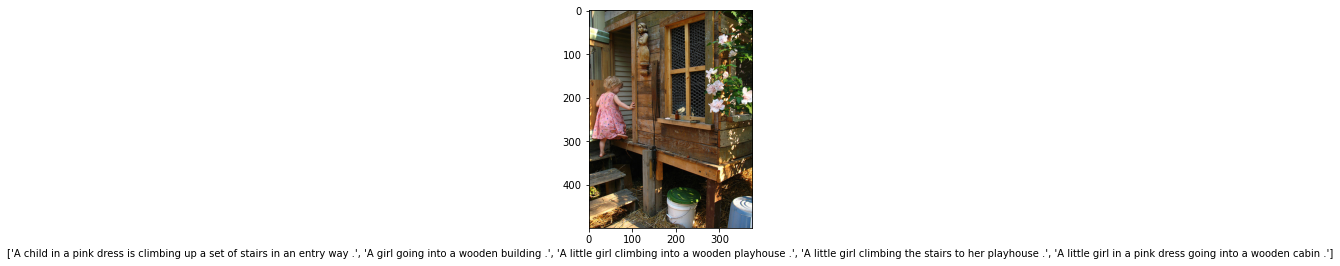

In [41]:
for k in imageFeatures.keys():
    plt.figure()
    img_name = './Flickr_Data/Images/' + k
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captionsDict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [42]:
def preProcessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [43]:
for k,v in captionsDict.items():
    for vv in v:
        captionsDict[k][v.index(vv)] = preProcessed(vv)

## Create Vocabulary

In [45]:
countWords = {}

for k, vv in captionsDict.items():
    for v in vv:
        for word in v.split():
            if word not in countWords:
                countWords[word] = 0
            else:
                countWords[word] += 1

In [47]:
len(countWords)

3988

In [48]:
THRESH = -1
count = 1
newDict = {}
for k,v in countWords.items():
    if countWords[k] > THRESH:
        newDict[k] = count
        count += 1

In [49]:
len(newDict)

3988

In [53]:
newDict['<OUT>'] = len(newDict) 
captionsBackup = captionsDict.copy()
captionsDict = captionsBackup.copy()

In [54]:
for k, vv in captionsDict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in newDict:
                encoded.append(newDict['<OUT>'])
            else:
                encoded.append(newDict[word])

        captionsDict[k][vv.index(v)] = encoded

In [55]:
captionsDict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

## Build Generator Function

In [57]:
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [58]:
# Initialize a variable to keep track of the maximum length of the captions
maxLen = 0

# Loop through all the captions
for k, vv in captionsDict.items():
    for v in vv:
        # Find the length of the current caption
        length = len(v)
        # If the length of the current caption is greater than the maximum length found so far
        if length > maxLen:
            # Update the maximum length
            maxLen = length
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 250, 31, 13, 251, 136, 252, 253, 82, 25, 254, 136, 64, 88, 26, 2, 255, 37, 2, 131, 82, 256, 16, 17]
[1, 2, 77, 7, 93, 25, 247, 11, 2, 237, 9, 26, 81, 226, 4, 59, 11, 400, 340, 80, 188, 77, 192, 40, 16, 17]
[1, 2, 77, 4, 144, 565, 2, 23, 149, 9, 4, 25, 230, 31, 589, 195, 83, 26, 590, 389, 591, 298, 106, 219, 83, 16, 17]
[1, 25, 18, 4, 25, 656, 586, 657, 7, 145, 88, 26, 48, 75, 200, 658, 147, 7, 103, 2, 29, 659, 31, 25, 39, 7, 660, 661, 16, 17]
[1, 72, 33, 349, 75, 200, 136, 147, 561, 904, 93, 2, 905, 906, 136, 147, 37, 134, 907, 884, 31, 849, 4, 27, 226, 136, 31, 147, 37, 908, 473, 16, 17]
[1, 2, 18, 4, 2, 112, 31, 29, 1485, 37, 42, 1265, 7, 145, 88, 26, 2, 77, 4, 2,

In [59]:
maxLen

37

In [60]:
captionsDict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [61]:
# Batch size for the data generator
batchSize = 5000

# Size of the vocabulary
vocabSize = len(newDict)

def generator(imageFeatures, captionsDict):
    # Initialize a variable to keep track of the number of samples
    nSamples = 0
    
    X = []
    yIn = []
    yOut = []
    
    # Loop through the captions
    for k, vv in captionsDict.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(imageFeatures[k])

                inSeq= [v[:i]]
                outSeq = v[i]

                inSeq = pad_sequences(inSeq, maxlen=maxLen, padding='post', truncating='post')[0]
                outSeq = to_categorical([outSeq], num_classes=vocabSize)[0]

                yIn.append(inSeq)
                yOut.append(outSeq)
            
    return X, yIn, yOut

In [62]:
X, yIn, yOut = generator(imageFeatures, captionsDict)

In [63]:
len(X), len(yIn), len(yOut)

(96750, 96750, 96750)

In [64]:
X = np.array(X)
yIn = np.array(yIn, dtype='float64')
yOut = np.array(yOut, dtype='float64')

In [65]:
X.shape, yIn.shape, yOut.shape

((96750, 2048), (96750, 37), (96750, 3989))

In [66]:
X[1510]

array([1.8855388 , 0.58140707, 0.6403071 , ..., 0.16447964, 0.02742814,
       1.0963618 ], dtype=float32)

In [68]:
yIn[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# Model Training

In [76]:
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [77]:
embeddingSize = 128
vocabSize = len(newDict)

imageModel = Sequential()

imageModel.add(Dense(embeddingSize, input_shape=(2048,), activation='relu'))
imageModel.add(RepeatVector(maxLen))

imageModel.summary()

languageModel = Sequential()

languageModel.add(Embedding(input_dim=vocabSize, output_dim=embeddingSize, input_length=maxLen))
languageModel.add(LSTM(256, return_sequences=True))
languageModel.add(TimeDistributed(Dense(embeddingSize)))

languageModel.summary()

conca = Concatenate()([imageModel.output, languageModel.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocabSize)(x)
out = Activation('softmax')(x)
model = Model(inputs=[imageModel.input, languageModel.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 37, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 37, 128)           510592    
                                                                 
 lstm_3 (LSTM)               (None, 37, 256)           394240    
                          

In [79]:
model.fit([X, yIn], yOut, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 454s 2s/step - loss: 5.2169 - accuracy: 0.1266
Epoch 2/50
189/189 [==============================] - 401s 2s/step - loss: 4.6752 - accuracy: 0.2008
Epoch 3/50
189/189 [==============================] - 385s 2s/step - loss: 4.3573 - accuracy: 0.2505
Epoch 4/50
189/189 [==============================] - 374s 2s/step - loss: 4.2093 - accuracy: 0.2653
Epoch 5/50
189/189 [==============================] - 352s 2s/step - loss: 4.0915 - accuracy: 0.2768
Epoch 6/50
189/189 [==============================] - 336s 2s/step - loss: 3.9618 - accuracy: 0.2911
Epoch 7/50
189/189 [==============================] - 339s 2s/step - loss: 3.8023 - accuracy: 0.3066
Epoch 8/50
189/189 [==============================] - 340s 2s/step - loss: 3.6271 - accuracy: 0.3264
Epoch 9/50
189/189 [==============================] - 354s 2s/step - loss: 3.4870 - accuracy: 0.3411
Epoch 10/50
189/189 [==============================] - 328s 2s/step - loss: 3.3433 - accura

In [80]:
invDict = {v:k for k, v in newDict.items()}

In [81]:
model.save('model.h5')

In [82]:
model.save_weights('mine_model_weights.h5')

In [83]:
np.save('vocab.npy', newDict)

In [84]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

## Predictions

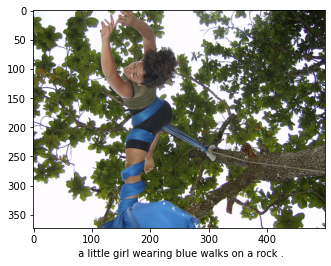

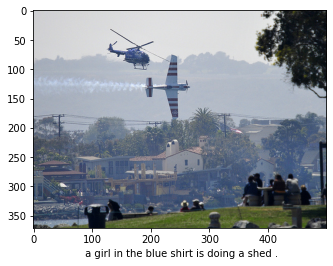

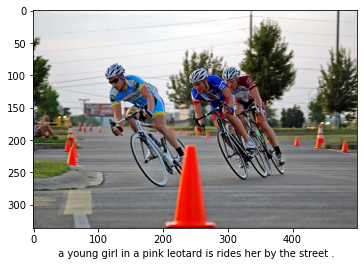

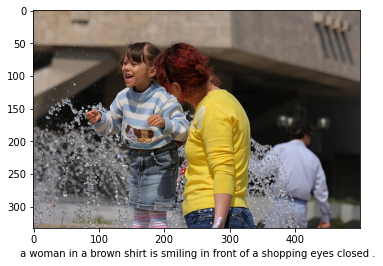

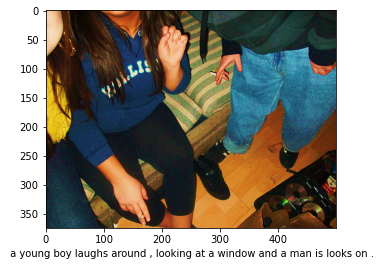

In [92]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = truncatedModel.predict(getImage(no), verbose=0).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(newDict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=maxLen)


        prediction = np.argmax(model.predict([test_feature, encoded], verbose=0))

        sampled_word = invDict[prediction]

        if sampled_word == 'endofseq':
            break
        
        caption = caption + ' ' + sampled_word
            
        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)